In [43]:
from google.colab import drive
import os
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/final'

%cd $path
%pwd $path
os.chdir('/content/drive/MyDrive/Colab Notebooks/final')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/final


# About the dataset

| Variable                 | Definition                                                                                      |
|--------------------------|-------------------------------------------------------------------------------------------------|
| Loan_ID                  | A unique id for the loan.                                                                       |
| Loan_Amount_Requested    | The listed amount of the loan applied for by the borrower.                                      |
| Length_Employed          | Employment length in years                                                                     |
| Home_Owner               | The home ownership status provided by the borrower during registration. Values are: Rent, Own, Mortgage, Other. |
| Annual_Income            | The annual income provided by the borrower during registration                                  |
| Income_Verified          | Indicates if income was verified, not verified, or if the income source was verified           |
| Purpose_Of_Loan          | A category provided by the borrower for the loan request.                                       |
| Debt_To_Income           | A ratio calculated using the borrower's total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, divided by the borrower's self-reported monthly income. |
| Inquiries_Last_6Mo       | The number of inquiries by creditors during the past 6 months.                                  |
| Months_Since_Deliquency  | The number of months since the borrower's last delinquency.                                     |
| Number_Open_Accounts     | The number of open credit lines in the borrower's credit file.                                  |
| Total_Accounts           | The total number of credit lines currently in the borrower's credit file                        |
| Gender                   | Gender                                                                                          |


# Load and Overview of the Dataset (along with preprocessing)

In [44]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [45]:
data = pd.read_csv("Banking.csv")

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [47]:
numeric_cols = [feature for feature in data.columns if data[feature].dtype != "O"]
data[numeric_cols].head()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
0,10000001,68000.0,18.37,0,NaN,9,14,1
1,10000002,NaN,14.93,0,17.0,12,24,3
2,10000003,75566.4,15.88,0,NaN,12,16,3
3,10000004,56160.0,14.34,3,NaN,16,22,3
4,10000005,96000.0,22.17,1,NaN,19,30,1


In [48]:
data.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,4.743207e+04,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,1.000000e+07,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,1.016431e+07,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


In [49]:
categorical_cols = [feature for feature in data.columns if data[feature].dtype == "O"]
data[categorical_cols].head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Income_Verified,Purpose_Of_Loan,Gender
0,"7,000",< 1 year,Rent,not verified,car,Female
1,"30,000",4 years,Mortgage,VERIFIED - income,debt_consolidation,Female
2,"24,725",7 years,Mortgage,VERIFIED - income source,debt_consolidation,Male
3,"16,000",< 1 year,NaN,VERIFIED - income source,debt_consolidation,Male
4,"17,000",8 years,Own,VERIFIED - income source,debt_consolidation,Female


In [50]:
# percent of missing
tmp = data.isna().sum()/ len(data)
tmp[tmp!=0]

Length_Employed            0.044861
Home_Owner                 0.154276
Annual_Income              0.152773
Months_Since_Deliquency    0.537883
dtype: float64

In [51]:
# check categorical columns with unique value
object_data = data.select_dtypes(include=[object])
object_data.nunique()

Loan_Amount_Requested    1290
Length_Employed            11
Home_Owner                  5
Income_Verified             3
Purpose_Of_Loan            14
Gender                      2
dtype: int64

General comments about the dataset:
- The "Loan_ID" column is irrelevant for the classification problem, and thus we will remove this column.
- The "Loan_Amount_Requested" column seems to represent a quantitative value but is currently in a qualitative format. We will further examine this column to convert it to the appropriate data type.
- Some quantitative columns exhibit significant disparities in their minimum, maximum, and standard deviation values.
- There are 4 columns with missing data.

In [52]:
# Use regular expression to find non-numeric characters or special formatting in Loan_Amount_Requested
import re
for value in data["Loan_Amount_Requested"]:
    if re.search(r"[^\d,]", str(value)):
        print(f"Non-numeric value found: {value}")

There are no values with incorrect formatting. However, it is possible that the values in this column include commas as thousands separators.

In [53]:
def first_preprocessing_df(df):
    # drop unnecessary column
    df = df.drop(["Loan_ID"], axis=1)
    # Remove commas from the values and replace them with an empty string
    df["Loan_Amount_Requested"] = df["Loan_Amount_Requested"].str.replace(",", "")
    # Convert the column to a numerical df type (float)
    df["Loan_Amount_Requested"] = df["Loan_Amount_Requested"].astype(float)
    return df

data = first_preprocessing_df(data)

In [54]:
# recheck
categorical_cols = [feature for feature in data.columns if data[feature].dtype == "O"]
data[categorical_cols].head()

,Length_Employed,Home_Owner,Income_Verified,Purpose_Of_Loan,Gender
0,< 1 year,Rent,not verified,car,Female
1,4 years,Mortgage,VERIFIED - income,debt_consolidation,Female
2,7 years,Mortgage,VERIFIED - income source,debt_consolidation,Male
3,< 1 year,NaN,VERIFIED - income source,debt_consolidation,Male
4,8 years,Own,VERIFIED - income source,debt_consolidation,Female


# Data Analysis (along with preprocessing)

## Missing value

In [55]:
# percent of missing
tmp = data.isna().sum()/ len(data)
tmp[tmp!=0]

Length_Employed            0.044861
Home_Owner                 0.154276
Annual_Income              0.152773
Months_Since_Deliquency    0.537883
dtype: float64

Comments:
- The "Length_Employed" column has a very low missing value rate, so it is advisable to delete the missing observations.
- For the "Home_Owner," "Annual_Income," and "Months_Since_Deliquency" columns, further investigation of the data is needed.

In [56]:
# check when region_category is nan, what happen to another missing value
tmp = data[data["Months_Since_Deliquency"].isna()].isna().sum()/ len(data[data["Months_Since_Deliquency"].isna()])
tmp[tmp!=0]

Length_Employed            0.044830
Home_Owner                 0.153034
Annual_Income              0.152944
Months_Since_Deliquency    1.000000
dtype: float64

Comment: When the column "Months_Since_Delinquency" is missing, it is not related to the other missing values of the others

### Months_Since_Deliquency

In [57]:
data["Months_Since_Deliquency"].value_counts()

9.0      1518
10.0     1510
14.0     1487
12.0     1484
8.0      1474
         ... 
95.0        1
127.0       1
141.0       1
119.0       1
170.0       1
Name: Months_Since_Deliquency, Length: 122, dtype: int64

In [58]:
try:
    data["Months_Since_Deliquency"].value_counts()["0"]
except:
    print("there is no key 0")

there is no key 0


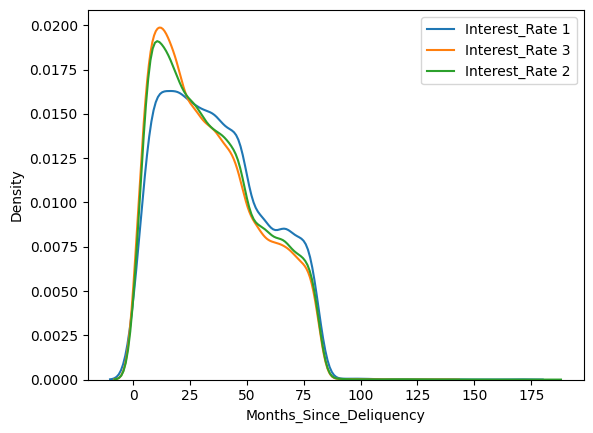

In [59]:
labels = data['Interest_Rate'].unique()
for label in labels:
    subset = data[data['Interest_Rate'] == label]
    sns.kdeplot(subset['Months_Since_Deliquency'], label=f'Interest_Rate {label}')

plt.xlabel('Months_Since_Deliquency')
plt.ylabel('Density')
plt.legend()
plt.show()

Comment:
From the information found, the majority of these missing values belong to customers who have never had any delinquency. Therefore, we can set these missing values to 0.

### Home_Owner

In [60]:
data["Home_Owner"].value_counts()

Mortgage    70345
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

<Figure size 1600x1000 with 0 Axes>

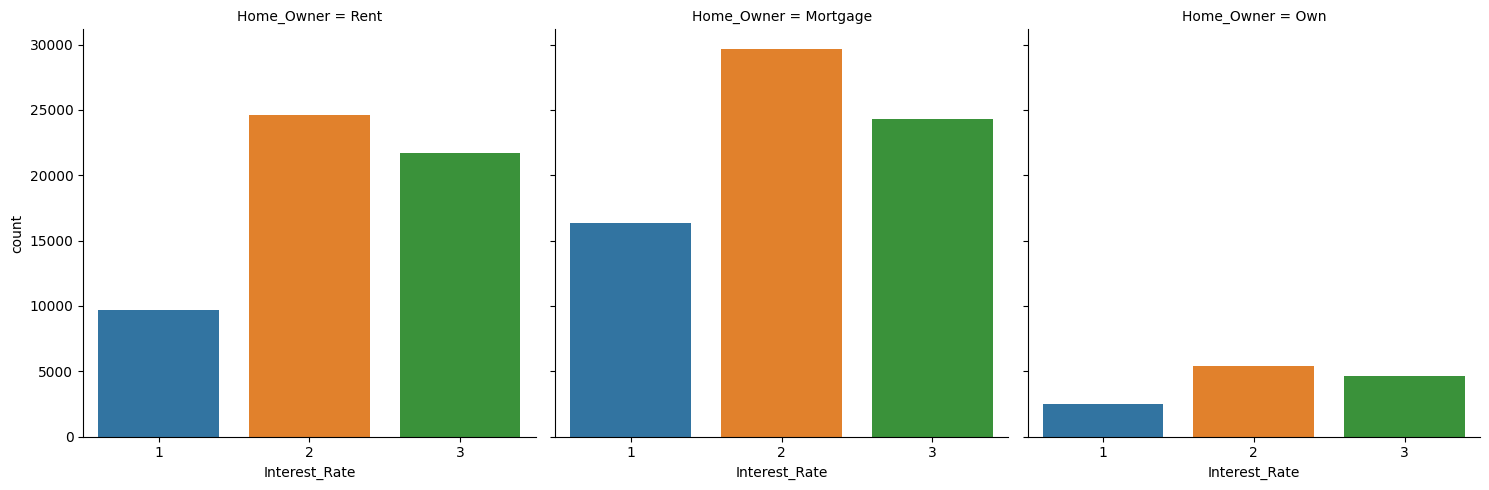

<Figure size 600x400 with 0 Axes>

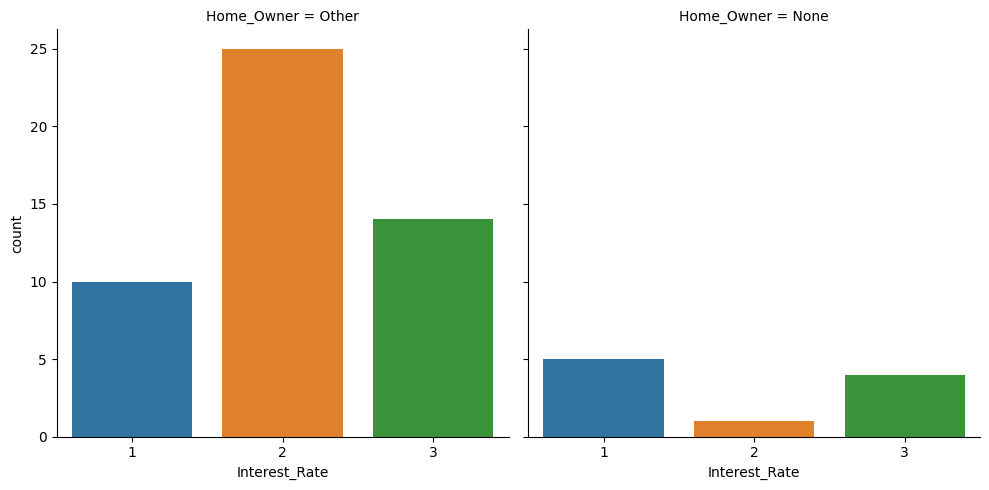

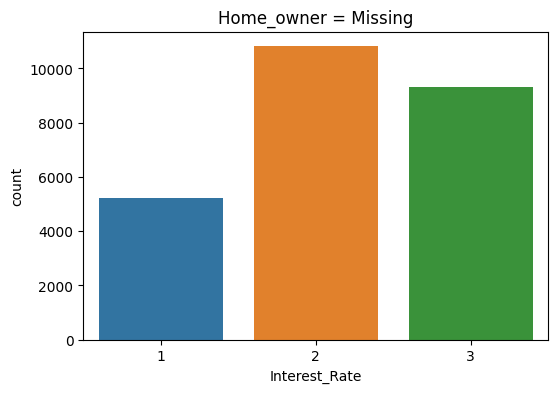

In [61]:
# check the distribution of home_owner whether to effect the label
plt.figure(figsize=(16,10))
sns.catplot(x="Interest_Rate", kind="count", data=data[(data["Home_Owner"] == "Mortgage") | (data["Home_Owner"] == "Rent")| (data["Home_Owner"] == "Own")], col="Home_Owner")
plt.show()
plt.figure(figsize=(6,4 ))
sns.catplot(x="Interest_Rate", kind="count", data=data[(data["Home_Owner"] == "Other") | (data["Home_Owner"] == "None")], col="Home_Owner")
plt.show()
plt.figure(figsize=(6, 4))
sns.countplot(x='Interest_Rate', data=data[data['Home_Owner'].isna()])
plt.title("Home_owner = Missing")
plt.show()

Comment: We are unable to obtain any information from the numerous missing values in this column. Additionally, since there is a substantial number of missing values, and this column is categorical in nature, we regard these missing values as a distinct attribute of the column.

### Annual_Income

In [62]:
data["Annual_Income"].value_counts()

60000.0     5462
50000.0     4783
65000.0     4012
40000.0     3856
70000.0     3667
            ... 
50343.0        1
25012.0        1
208851.0       1
91342.0        1
24864.0        1
Name: Annual_Income, Length: 12305, dtype: int64

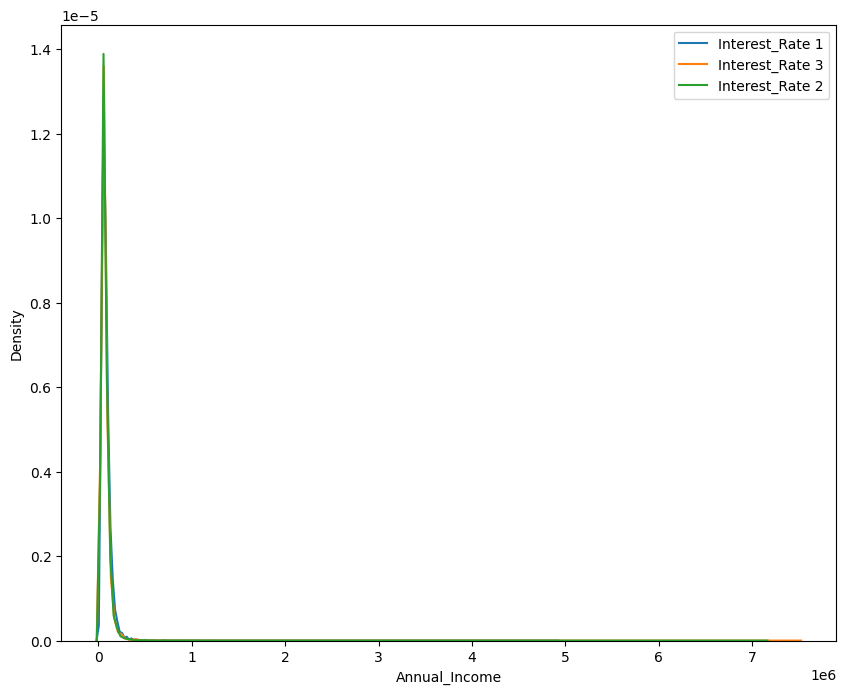

In [63]:

plt.figure(figsize=(10,8))
labels = data['Interest_Rate'].unique()
for label in labels:
    subset = data[data['Interest_Rate'] == label]
    sns.kdeplot(subset['Annual_Income'], label=f'Interest_Rate {label}')

plt.xlabel('Annual_Income')
plt.ylabel('Density')
plt.legend()
plt.show()


Comment: We fill the missing values in this column with the mode of the column.

### Process missing data

In [64]:
def handle_missing_value(df):
    # fill missing df with  value
    df['Annual_Income'] = df['Annual_Income'].fillna(df['Annual_Income'].mode()[0])
    df['Home_Owner'] = df['Home_Owner'].fillna("Unknown")
    df['Months_Since_Deliquency'] = df['Months_Since_Deliquency'].fillna(df['Months_Since_Deliquency'].mode()[0])
    # drop missing df
    df.drop(df[df["Length_Employed"].isna()].index, inplace=True)
    return df

data = handle_missing_value(data)

In [65]:
# recheck
# percent of missing
tmp = data.isna().sum()/ len(data)
tmp[tmp!=0]

Series([], dtype: float64)

## outlier and other problems

### Numeric columns

#### First look

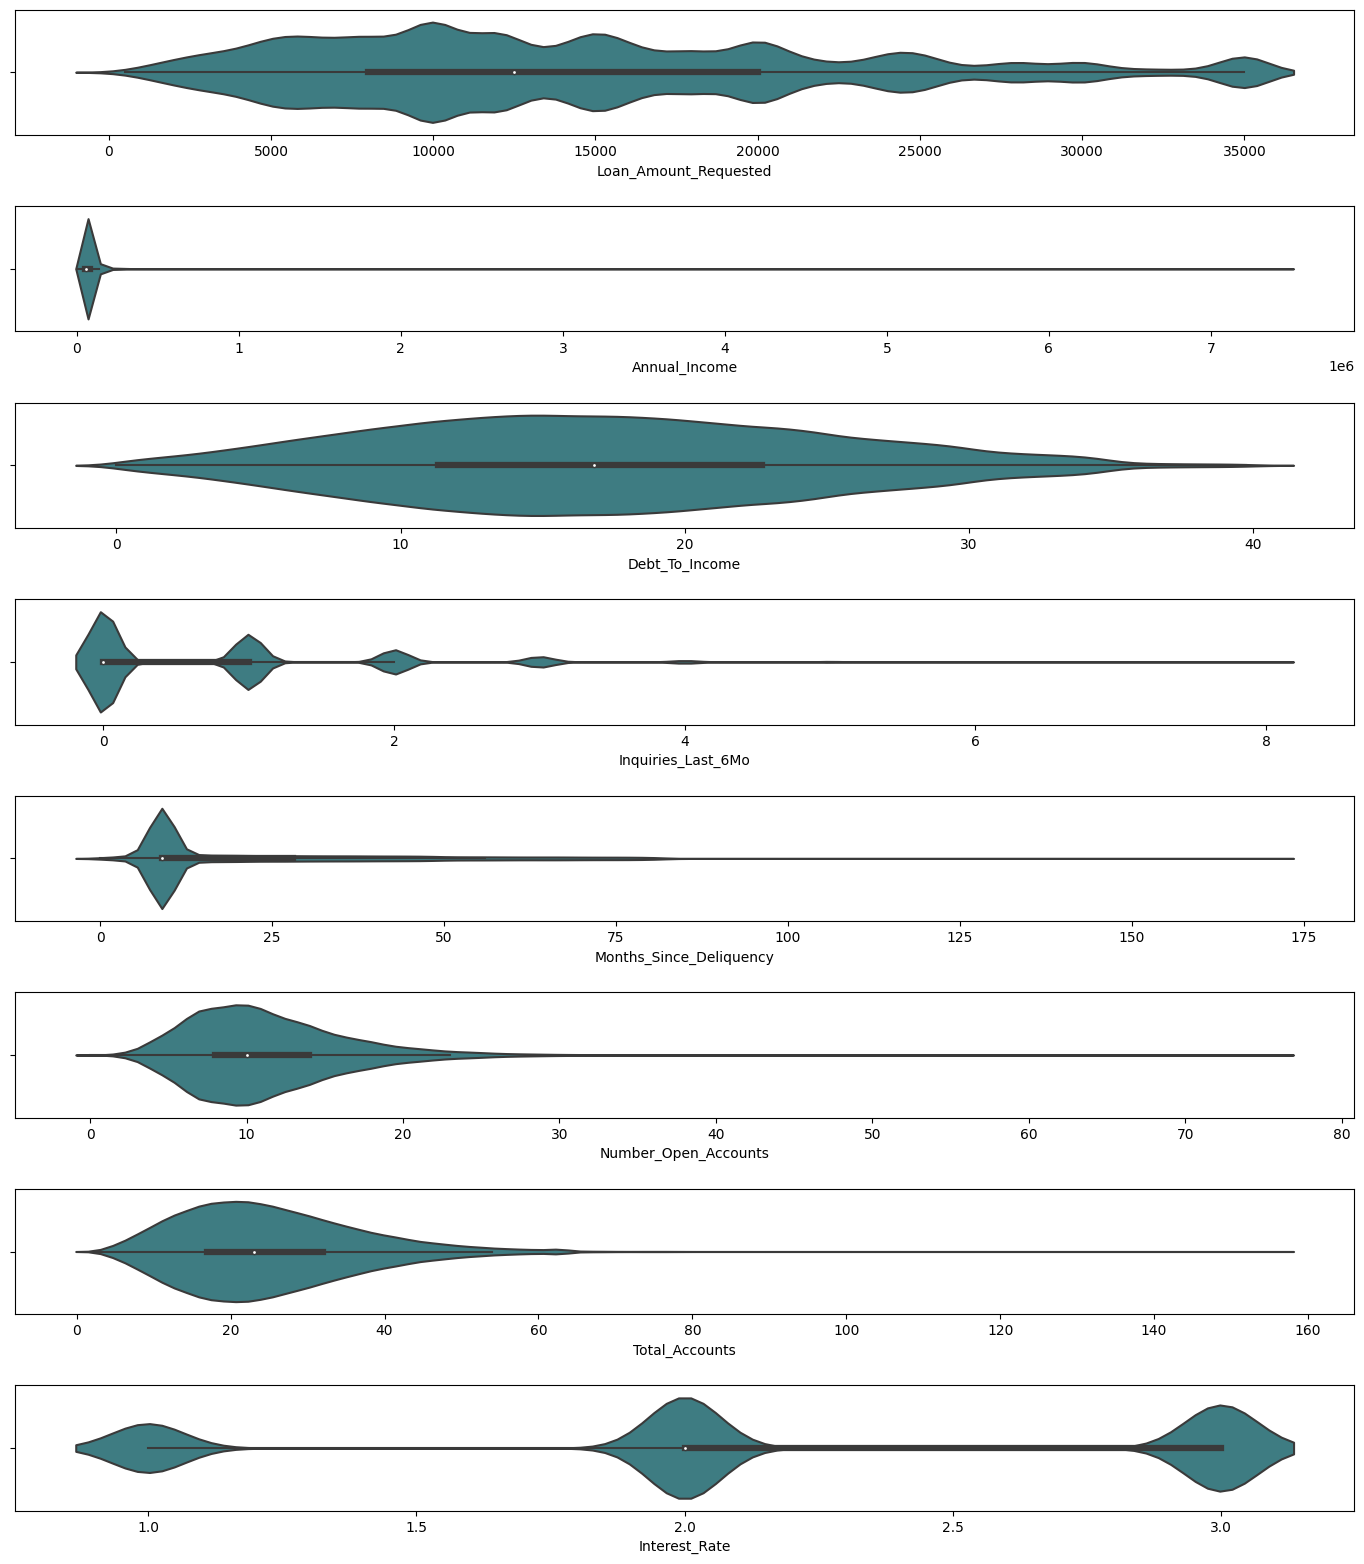

In [66]:
numerical_cols = [feature for feature in data.columns if data[feature].dtype != "O"]
fig, axes=plt.subplots(len(numerical_cols), 1, figsize=(14, 2*len(numerical_cols)),sharex=False,sharey=False)

for i, column in enumerate(numerical_cols):
    sns.violinplot(x=column, data=data, palette='crest', ax=axes[i])
plt.tight_layout(pad=2.0)

Comment:
The data does not have any unusual numeric columns, but some columns have high right-skewed outliers. We will perform robust scaling to reduce the impact of these values.

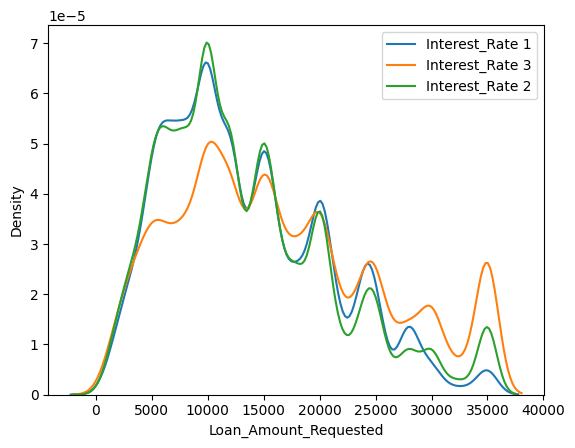

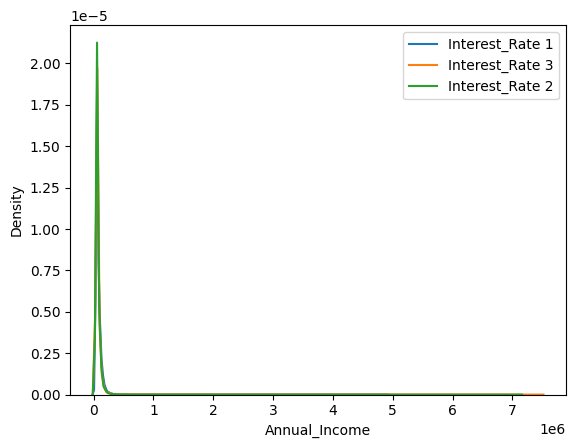

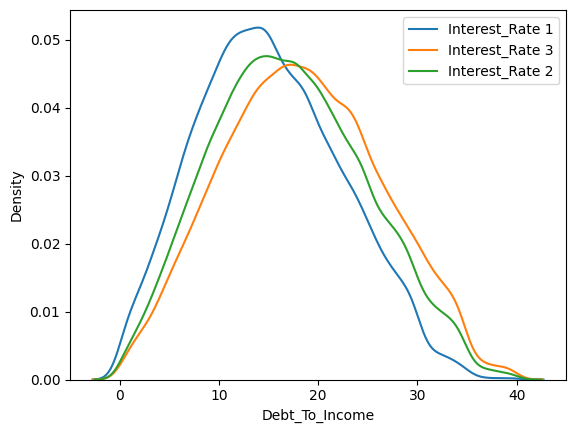

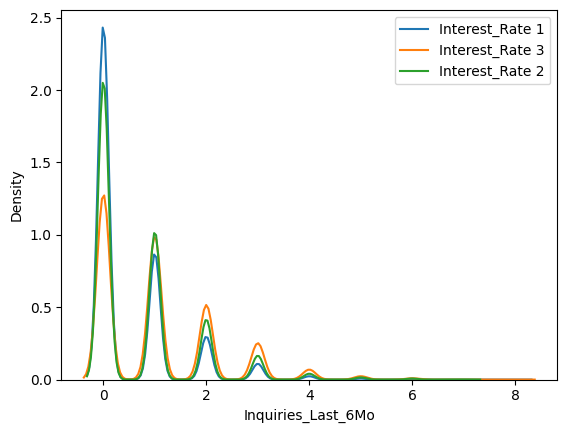

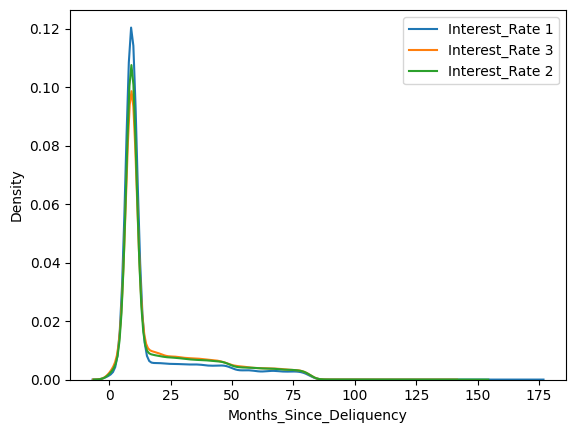

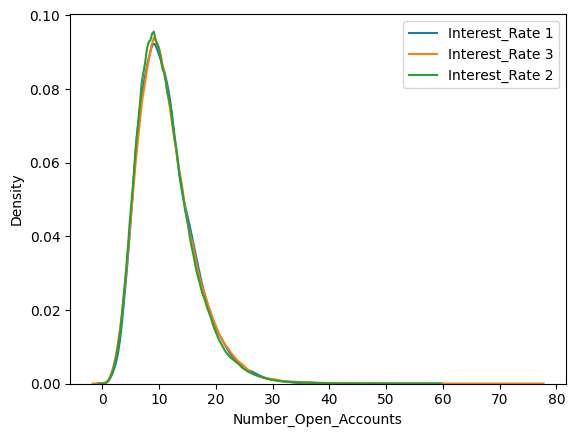

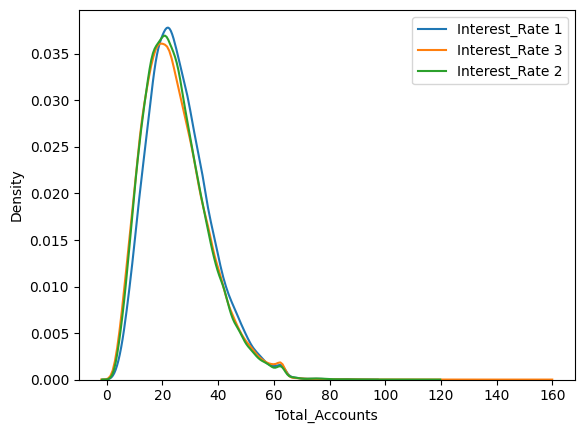

<ipython-input-67-5e189999097e>:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[column], label=f'Interest_Rate {label}')
<ipython-input-67-5e189999097e>:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[column], label=f'Interest_Rate {label}')
<ipython-input-67-5e189999097e>:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset[column], label=f'Interest_Rate {label}')


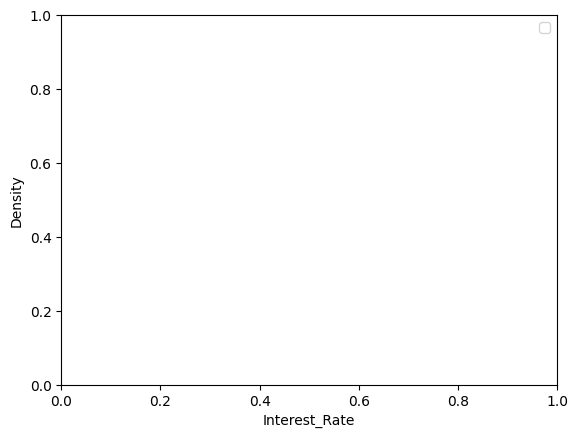

In [67]:
# Final check
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = data.select_dtypes(include='number').columns

for column in numeric_columns:
    plt.figure()
    labels = data['Interest_Rate'].unique()

    for label in labels:
        subset = data[data['Interest_Rate'] == label]
        sns.kdeplot(subset[column], label=f'Interest_Rate {label}')

    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


### Categorical value

In [68]:
categorical_cols = [feature for feature in data.columns if data[feature].dtype == "O"]
data[categorical_cols].head()

,Length_Employed,Home_Owner,Income_Verified,Purpose_Of_Loan,Gender
0,< 1 year,Rent,not verified,car,Female
1,4 years,Mortgage,VERIFIED - income,debt_consolidation,Female
2,7 years,Mortgage,VERIFIED - income source,debt_consolidation,Male
3,< 1 year,Unknown,VERIFIED - income source,debt_consolidation,Male
4,8 years,Own,VERIFIED - income source,debt_consolidation,Female


In [69]:
for i in categorical_cols:
    display(data[i].value_counts())

10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64

Mortgage    67376
Rent        53863
Unknown     24186
Own         11456
Other          48
None            9
Name: Home_Owner, dtype: int64

VERIFIED - income           53829
not verified                51574
VERIFIED - income source    51535
Name: Income_Verified, dtype: int64

debt_consolidation    93186
credit_card           34820
home_improvement       8751
other                  7825
major_purchase         3273
small_business         2333
car                    1796
medical                1452
moving                  923
wedding                 816
vacation                782
house                   744
educational             119
renewable_energy        118
Name: Purpose_Of_Loan, dtype: int64

Male      111932
Female     45006
Name: Gender, dtype: int64

In [70]:
def preprocessing_categorical_columns(df):

    # Ordinal Encoding base on meaning of value
    Length_Employed_mapping = {
        '< 1 year': 0,
        '1 year': 1,
        '2 years': 2,
        '3 years': 3,
        '4 years': 4,
        '5 years': 5,
        '6 years': 6,
        '7 years': 7,
        '8 years': 8,
        '9 years': 9,
        '10+ years': 10
    }
    Income_Verified_mapping = {
        'not verified': 0,
        'VERIFIED - income': 1,
        'VERIFIED - income source': 2
    }
    data['Income_Verified'] = data['Income_Verified'].map(Income_Verified_mapping)
    data['Length_Employed'] = data['Length_Employed'].map(Length_Employed_mapping)


    # dummy remain category columns
    df_objs = df.select_dtypes(include='object')
    df_nums = df.select_dtypes(exclude='object')
    df_objs = pd.get_dummies(df_objs,drop_first=True)
    df = pd.concat([df_nums,df_objs],axis=1)
    return df

data = preprocessing_categorical_columns(data)

In [71]:
# re-check
categorical_cols = [feature for feature in data.columns if data[feature].dtype == "O"]
categorical_cols

[]

## Class weight

<Axes: >

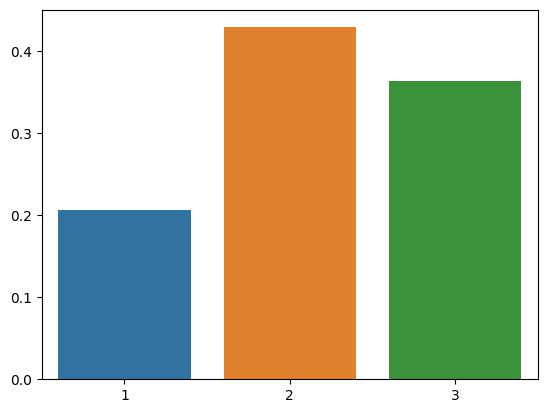

In [72]:
class_weight = data["Interest_Rate"].value_counts(normalize=True).to_dict()
sns.barplot(x=list(class_weight.keys()), y=list(class_weight.values()))

Comment: The dataset shows a considerable imbalance, we will proceed with data resampling.

## Prepare final data


In [73]:
data.head()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate,...,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Male
0,7000.0,0,68000.0,0,18.37,0,9.0,9,14,1,...,0,0,0,0,0,0,0,0,0,0
1,30000.0,4,60000.0,1,14.93,0,17.0,12,24,3,...,0,0,0,0,0,0,0,0,0,0
2,24725.0,7,75566.4,2,15.88,0,9.0,12,16,3,...,0,0,0,0,0,0,0,0,0,1
3,16000.0,0,56160.0,2,14.34,3,9.0,16,22,3,...,0,0,0,0,0,0,0,0,0,1
4,17000.0,8,96000.0,2,22.17,1,9.0,19,30,1,...,0,0,0,0,0,0,0,0,0,0


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE

def splitting_data(data, target):

    X = data.drop(target, axis=1)
    y = data[target]

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Feature scaling using RobustScaler
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Oversampling the minority class using SMOTE
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
    return X_train_resampled, X_test_scaled, y_train_resampled, y_test

target = "Interest_Rate"
X_train, X_test, y_train, y_test = splitting_data(data, target)

In [75]:
X_train.shape, X_test.shape

((142026, 28), (47082, 28))

## Some analysis with final dataset

<Axes: >

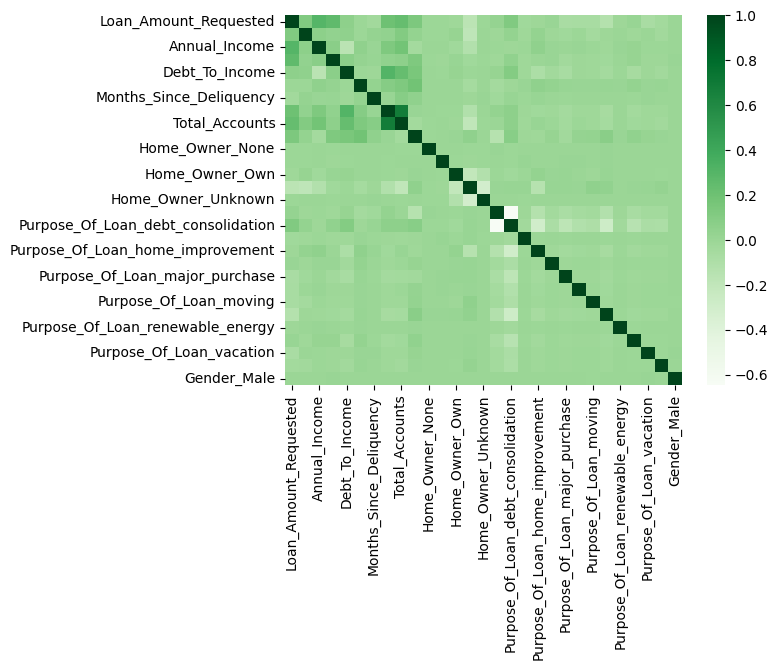

In [76]:
sns.heatmap(data.corr(), cmap = "Greens")

<Axes: >

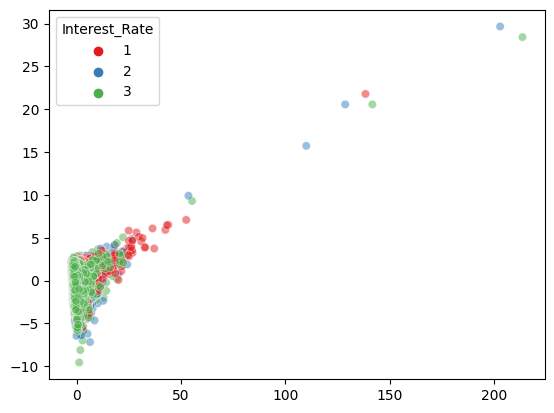

In [77]:
# test plot 2D sccatter plot with real label
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_train)
sns.scatterplot(x = x_pca[:,0], y =x_pca[:,1], hue = y_train,palette="Set1", alpha = 0.5)


# Apply machine learning model

Comment: Since this is a classification problem, I conducted training experiments with the following approaches and their variants:
- Logistic regression
- Support vector machine
- Naive Bayes
- Decision tree

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

def test_model_with_grid_search(clf, param_grid, X_train, X_test, y_train, y_test):
    grid_search = GridSearchCV(estimator=clf,
                          param_grid=param_grid,
                          n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print(grid_search.best_params_)
    predicted_label = grid_search.predict(X_test)
    print(classification_report(y_test, predicted_label))


## Decision tree and its variants

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
param_grid = {
    'criterion': ["gini","entropy"],
    'max_depth' : [5, 10, 20],
    'min_samples_split': [5, 10, 20, 50],
    }

test_model_with_grid_search(clf, param_grid, X_train, X_test, y_train, y_test)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 20}
              precision    recall  f1-score   support

           1       0.37      0.51      0.43      9780
           2       0.49      0.39      0.43     20066
           3       0.55      0.57      0.56     17236

    accuracy                           0.48     47082
   macro avg       0.47      0.49      0.47     47082
weighted avg       0.49      0.48      0.48     47082



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
param_grid = {'n_estimators':[50],
             'max_features': ['sqrt', 'log2'],
             'max_depth' : [5, 10, 20],
             'bootstrap':[True,False],
             'oob_score':[True,False]
             }

test_model_with_grid_search(clf, param_grid, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/li

{'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 50, 'oob_score': False}
              precision    recall  f1-score   support

           1       0.42      0.43      0.43      9780
           2       0.50      0.46      0.48     20066
           3       0.56      0.59      0.57     17236

    accuracy                           0.50     47082
   macro avg       0.49      0.50      0.49     47082
weighted avg       0.50      0.50      0.50     47082



In [ ]:
from xgboost import XGBClassifier
clf = XGBClassifier()
param_grid = {
    'n_estimators': [50],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01]
}
test_model_with_grid_search(clf, param_grid, X_train, X_test, y_train-1, y_test-1)

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.43      0.45      0.44      9780
           1       0.51      0.47      0.49     20066
           2       0.58      0.62      0.60     17236

    accuracy                           0.52     47082
   macro avg       0.51      0.51      0.51     47082
weighted avg       0.52      0.52      0.52     47082



## Naive bayes

In [253]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
pca = PCA()
clf = Pipeline([
    ('pca', pca),
    ('naive_bayes', naive_bayes)
])
param_grid = {
    "pca__n_components": [2,5,10],
    'naive_bayes__var_smoothing': np.logspace(-2, -6, num=3)
    }
test_model_with_grid_search(clf, param_grid, X_train, X_test, y_train, y_test)

{'naive_bayes__var_smoothing': 1e-06, 'pca__n_components': 10}
              precision    recall  f1-score   support

           1       0.30      0.65      0.41      9780
           2       0.48      0.24      0.32     20066
           3       0.54      0.50      0.52     17236

    accuracy                           0.42     47082
   macro avg       0.44      0.46      0.42     47082
weighted avg       0.46      0.42      0.41     47082



## SVM

In [256]:
from sklearn.svm import SVC
clf = SVC()
param_grid = {'C':[ 1],
              'gamma': ['scale'],
              'kernel':['rbf']
             }
test_model_with_grid_search(clf, param_grid, X_train, X_test, y_train, y_test)

## MLP

In [257]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)
predicted_label = clf.predict(X_test)
print(classification_report(y_test, predicted_label))

              precision    recall  f1-score   support

           1       0.36      0.43      0.39      9780
           2       0.49      0.43      0.46     20066
           3       0.56      0.57      0.56     17236

    accuracy                           0.48     47082
   macro avg       0.47      0.48      0.47     47082
weighted avg       0.49      0.48      0.48     47082



## Logistic regression

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
clf = Pipeline([
    ('poly', PolynomialFeatures()),
    ('logreg', LogisticRegression())
])

param_grid = {
    'poly__degree': [1, 2],
    'logreg__penalty' : ['elasticnet'],
    'logreg__solver' : ['lbfgs', 'saga'],
    'logreg__l1_ratio': [0.1, 0.5, 0.9],
    'logreg__C' : np.logspace(0, 4, 3)
}

test_model_with_grid_search(clf, param_grid, X_train, X_test, y_train, y_test)

## Retrain best result

The best result obtained is with the XGB model, which has an accuracy of 52%. We will now experiment with increasing the complexity of the model even further with this model.

In [84]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=100, max_depth=10, learning_rate = 0.1)
clf.fit(X_train, y_train-1)
predicted_label = clf.predict(X_test)
print(classification_report(y_test-1, predicted_label))

              precision    recall  f1-score   support

           0       0.47      0.35      0.40      9780
           1       0.50      0.57      0.53     20066
           2       0.59      0.59      0.59     17236

    accuracy                           0.53     47082
   macro avg       0.52      0.50      0.51     47082
weighted avg       0.53      0.53      0.53     47082



Although increasing the complexity of the model continues to improve accuracy, due to hardware limitations, we will use this model as the final model with the following specific parameters: 'n_estimators': [100], 'max_depth': [10], 'learning_rate': [0.1].

## Analyze the result

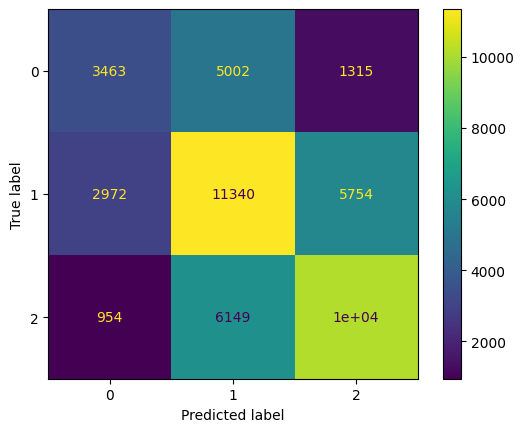

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test-1, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,    display_labels=clf.classes_)
disp.plot()
plt.show()

# Export model

In [89]:
import joblib

joblib.dump(clf, 'XGB_bank.pkl')


['XGB_bank.pkl']